# Assignment 9: November $5^{th}$, 2025 - Kanak Agarwal

## Naive Gauss Elimination Method

$$ 10 x_1 - 2 x_2 + x_3 = 9 $$
$$ -2 x_1 + 10 x_2 - 2 x_3 + x_4 = 15 $$
$$ x_1 - 2 x_2 + 10 x_3 - 2 x_4 = 27 $$
$$ x_2 - 2 x_3 + 10 x_4 = -11 $$

In [8]:
import numpy as np

def naive_gauss_elimination(A, b):
    n = len(b)
    # Forward elimination
    for k in range(n - 1):
        for i in range(k + 1, n):
            if A[k][k] == 0:
                raise ValueError("Division by zero detected! Pivoting needed!")
            factor = A[i][k] / A[k][k]
            for j in range(k, n):
                A[i][j] -= factor * A[k][j]
            b[i] -= factor * b[k]
    
    print("Upper Triangular Matrix A after Forward Elimination:")
    for row in A:
        print(row)
    print()

    # Back substitution
    x = [0] * n
    for i in range(n - 1, -1, -1):
        x[i] = b[i]
        for j in range(i + 1, n):
            x[i] -= A[i][j] * x[j]
        if A[i][i] == 0:
            raise ValueError("Division by zero detected!")
        x[i] /= A[i][i]

    return x

A = [[10, -2, 1, 0],
     [-2, 10, -2, 1],
     [1, -2, 10, -2],
     [0, 1, -2, 10]]
b = [9, 15, 27, -11]

solution = naive_gauss_elimination(A, b)
print("The solution is:", solution)

print("\nVerification using NumPy")
A_np = np.array([[10, -2, 1, 0],
                 [-2, 10, -2, 1],
                 [1, -2, 10, -2],
                 [0, 1, -2, 10]], dtype=float)
b_np = np.array([9, 15, 27, -11], dtype=float)
solution_np = np.linalg.solve(A_np, b_np)
print("The solution using NumPy is:", solution_np)

Upper Triangular Matrix A after Forward Elimination:
[10, -2, 1, 0]
[0.0, 9.6, -1.8, 1.0]
[0.0, -2.220446049250313e-16, 9.5625, -1.8125]
[0.0, 0.0, 0.0, 9.552287581699346]

The solution is: [1.0834758809442353, 2.3752993499828947, 2.915839890523435, -0.7543619568936025]

Verification using NumPy
The solution using NumPy is: [ 1.08347588  2.37529935  2.91583989 -0.75436196]


The given system of equations is diagonally dominant and hence stable, since the following conditions is satisfied for each equation.

$$ |a_{ii}| > \sum_{j \neq i} |a_{ij}| $$

And hence partial pivoting is not required.

## LU Decomposition (Doolittle's Method)

$$ 10 x_1 - 2 x_2 + x_3 = 9 $$
$$ -2 x_1 + 10 x_2 - 2 x_3 + x_4 = 15 $$
$$ x_1 - 2 x_2 + 10 x_3 - 2 x_4 = 27 $$
$$ x_2 - 2 x_3 + 10 x_4 = -11 $$

In [9]:
def lu_decomposition(A, b):
    n = len(b)
    L = np.zeros((n, n))
    U = np.zeros((n, n))

    # Doolittle's method
    for i in range(n):
        for j in range(i, n):
            U[i][j] = A[i][j]
            for k in range(i):
                U[i][j] -= L[i][k] * U[k][j]
        for j in range(i, n):
            if i == j:
                L[i][i] = 1
            else:
                L[j][i] = A[j][i]
                for k in range(i):
                    L[j][i] -= L[j][k] * U[k][i]
                L[j][i] /= U[i][i]

    print("Lower Triangular Matrix L:")
    print(L)
    print("\nUpper Triangular Matrix U:")
    print(U)
    print()

    # Solve Ly = b
    y = np.zeros(n)
    for i in range(n):
        y[i] = b[i]
        for j in range(i):
            y[i] -= L[i][j] * y[j]

    # Solve Ux = y
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = y[i]
        for j in range(i + 1, n):
            x[i] -= U[i][j] * x[j]
        x[i] /= U[i][i]

    return x

A = [[10, -2, 1, 0],
     [-2, 10, -2, 1],
     [1, -2, 10, -2],
     [0, 1, -2, 10]]
b = [9, 15, 27, -11]

solution = lu_decomposition(A, b)
print("The solution is:", solution)
print("\nVerification using NumPy")
A_np = np.array([[10, -2, 1, 0],
                 [-2, 10, -2, 1],
                 [1, -2, 10, -2],
                 [0, 1, -2, 10]], dtype=float)
b_np = np.array([9, 15, 27, -11], dtype=float)
solution_np = np.linalg.solve(A_np, b_np)
print("The solution using NumPy is:", solution_np)

Lower Triangular Matrix L:
[[ 1.          0.          0.          0.        ]
 [-0.2         1.          0.          0.        ]
 [ 0.1        -0.1875      1.          0.        ]
 [ 0.          0.10416667 -0.18954248  1.        ]]

Upper Triangular Matrix U:
[[10.         -2.          1.          0.        ]
 [ 0.          9.6        -1.8         1.        ]
 [ 0.          0.          9.5625     -1.8125    ]
 [ 0.          0.          0.          9.55228758]]

The solution is: [ 1.08347588  2.37529935  2.91583989 -0.75436196]

Verification using NumPy
The solution using NumPy is: [ 1.08347588  2.37529935  2.91583989 -0.75436196]


## Comparison of Results

$$ A = \begin{bmatrix} 10 & -2 & 1 & 0 \\ -2 & 10 & -2 & 1 \\ 1 & -2 & 10 & -2 \\ 0 & 1 & -2 & 10 \end{bmatrix}, \quad b_1 = \begin{bmatrix} 9 \\ 15 \\ 27 \\ -11 \end{bmatrix}, \quad b_2 = \begin{bmatrix} 5 \\ -3 \\ 12 \\ 7 \end{bmatrix}, \quad b_3 = \begin{bmatrix} 0 \\ 1 \\ -1 \\ 4 \end{bmatrix} $$

In [14]:
import time

def naive_gauss_elimination(A, b):
    n = len(b)
    # Forward elimination
    for k in range(n - 1):
        for i in range(k + 1, n):
            if A[k][k] == 0:
                raise ValueError("Division by zero detected! Pivoting needed!")
            factor = A[i][k] / A[k][k]
            for j in range(k, n):
                A[i][j] -= factor * A[k][j]
            b[i] -= factor * b[k]

    # Back substitution
    x = [0] * n
    for i in range(n - 1, -1, -1):
        x[i] = b[i]
        for j in range(i + 1, n):
            x[i] -= A[i][j] * x[j]
        if A[i][i] == 0:
            raise ValueError("Division by zero detected!")
        x[i] /= A[i][i]

    return x

def lu_decomposition(A, b):
    n = len(b)
    L = np.zeros((n, n))
    U = np.zeros((n, n))

    # Doolittle's method
    for i in range(n):
        for j in range(i, n):
            U[i][j] = A[i][j]
            for k in range(i):
                U[i][j] -= L[i][k] * U[k][j]
        for j in range(i, n):
            if i == j:
                L[i][i] = 1
            else:
                L[j][i] = A[j][i]
                for k in range(i):
                    L[j][i] -= L[j][k] * U[k][i]
                L[j][i] /= U[i][i]

    # Solve Ly = b
    y = np.zeros(n)
    for i in range(n):
        y[i] = b[i]
        for j in range(i):
            y[i] -= L[i][j] * y[j]

    # Solve Ux = y
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = y[i]
        for j in range(i + 1, n):
            x[i] -= U[i][j] * x[j]
        x[i] /= U[i][i]

    return x

A = [[10, -2, 1, 0],
     [-2, 10, -2, 1],
     [1, -2, 10, -2],
     [0, 1, -2, 10]]

b_1 = [9, 15, 27, -11]
b_2 = [5, -3, 12, 7]
b_3 = [0, 1, -1, 4]

times_naive = []
times_lu = []

for b in [b_1, b_2, b_3]:
    start_time = time.time()
    naive_gauss_elimination(A, b[:])
    end_time = time.time()
    times_naive.append(end_time - start_time)

    start_time = time.time()
    lu_decomposition(A, b[:])
    end_time = time.time()
    times_lu.append(end_time - start_time)

print("Execution times for Naive Gauss Elimination:", times_naive)
print("Execution times for LU Decomposition:", times_lu)

Execution times for Naive Gauss Elimination: [4.792213439941406e-05, 2.0742416381835938e-05, 1.621246337890625e-05]
Execution times for LU Decomposition: [0.00011944770812988281, 7.843971252441406e-05, 9.5367431640625e-05]


## Solving the Steady-State Heat Equation

The steady-state heat equation is given by,

$$
\nabla^2 T = 0
$$

In the discretized form for a 2D grid, this translates to,

$$
T_{i,j} = \frac{1}{4} (T_{i+1,j} + T_{i-1,j} + T_{i,j+1} + T_{i,j-1})
$$

Given,

- Left boundary (x=0): 100°C
- Right boundary (x=1): 0°C
- Top boundary (y=1): 75°C
- Bottom boundary (y=0): 50°C

and

- Grid => 5x5
- nx = 6
- ny = 6

Convergence criterion (Gauss-Seidel method),

$$
\left|T_{ij}^{(k+1)} - T_{ij}^{(k)}\right| < 10^{-4}
$$

In [44]:
# Initialization

nx = 6
ny = 6
T = np.zeros((nx, ny))

# Boundary conditions
T[0, :] = 75  # Top boundary
T[-1, :] = 50  # Bottom boundary
T[:, 0] = 100   # Left boundary
T[:, -1] = 0   # Right boundary

print("Initial temperature distribution with Boundary conditions:")
print(T)
print()

# Iterative solution
tolerance = 1e-4
max_iterations = 10000
for iteration in range(max_iterations):
    T_old = T.copy()
    for i in range(1, nx - 1):
        for j in range(1, ny - 1):
            T[i, j] = 0.25 * (T_old[i + 1, j] + T_old[i - 1, j] + T_old[i, j + 1] + T_old[i, j - 1])
    # Check for convergence
    if np.max(np.abs(T - T_old)) < tolerance:
        print(f"Converged after {iteration} iterations.")
        break
print()
print("Steady-state temperature distribution:")
print(T[1:-1, 1:-1])


Initial temperature distribution with Boundary conditions:
[[100.  75.  75.  75.  75.   0.]
 [100.   0.   0.   0.   0.   0.]
 [100.   0.   0.   0.   0.   0.]
 [100.   0.   0.   0.   0.   0.]
 [100.   0.   0.   0.   0.   0.]
 [100.  50.  50.  50.  50.   0.]]

Converged after 57 iterations.

Steady-state temperature distribution:
[[81.81804671 70.54902382 59.18538746 40.9089558 ]
 [81.72326624 66.19282811 50.2837372  29.45053897]
 [78.88235715 62.21555538 46.30646447 26.60962988]
 [71.59077399 57.480842   46.11720564 30.68168308]]


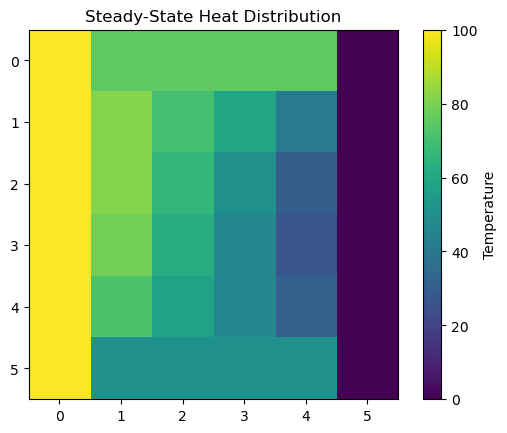

In [40]:
import matplotlib.pyplot as plt
plt.imshow(T, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Temperature')
plt.title('Steady-State Heat Distribution')
plt.show()